# TP1: Basics of Deep Learning and Pytorch 

**Authors:** 
- tom.dupuis@centralesupelec.fr


If you have questions or suggestions, contact us and we will gladly answer and take into account your remarks.

$\newcommand{\underbr}[2]{\underbrace{#1}_{\scriptscriptstyle{#2}}}$

## Objective:
We want to implement a two layers Multi-Layer Perceptron (MLP) with 1 hidden layer in Pytorch, for a binary classification problem.

The output of the network is simply the output of several cascaded functions :
- Linear transformations. We note the weights of a linear transformation with $W$
- Additive biases. We note the parameters of additive biases  with $b$
- Non-linearities.

For this, we will implement in the first part of the TP:
- the forward propagation
- the computation of the loss
- the backward propagation (to obtain the gradients)
- the update of the parameters

In the second part we will simply use pytorch API with a multi-classification problem.

Furthermore, we define the following sizes :

- $n^{[0]}$ : number of input neurons
- $n^{[1]}$ : number of neurons in hidden layer
- $n^{[2]}$ : number of neurons in output layer
- $m$ : number of training datapoints

### Loss function 

We want to solve a binary classification problem. Therefore we will use the binary cross-entropy loss function. The total loss function will be the average of the **loss** over the training data.

$\mathcal{L} = - \left( y \log(\hat{y}) + (1-y) \log(1-\hat{y}) \right),$

where 
- $y$ is the ground-truth labels of the data 
- $\hat{y}$ the predicted labels outputed by the network.

### Forward propagation

- $\large \underbr{Z^{[1]}}{(m,n^{[1]})} = \underbr{X}{(m,n^{[0]})} \underbr{W^{[1]}}{(n^{[0]},n^{[1]})}  + \underbr{b^{[1]}}{n^{(1)}} $
- $\large \underbr{A^{[1]}}{(m,n^{[1]})} = f(Z^{[1]})$
- $\large \underbr{Z^{[2]}}{(m,n^{[2]})} = \underbr{A^{[1]}}{(m,n^{[1]})} \underbr{W^{[2]}}{(n^{[1]},n^{[2]})}  + \underbr{b^{[2]}}{n^{(2)}}$
- $\large \underbr{A^{[2]}}{(m,n^{[2]})} = \sigma(Z^{[2]})$

where 
- $f$ is a ```Relu``` function (the code is provided)
- $\sigma$ is a sigmoid function (the code is provided)

### Backward propagation

Notation:
we note partial derivatives of the loss w.r.t. parameters as the following
- $dA^{[i]}: \frac{dLoss}{dA^{[i]}}$

- $dZ^{[i]}: \frac{dLoss}{dZ^{[i]}}$
- $dW^{[i]}: \frac{dLoss}{dW^{[i]}}$
- $db^{[i]}: \frac{dLoss}{db^{[i]}}$

It is an abusive notation that simplifies variable naming in code.

The backward propagation can be calculated as

- $\large \underbr{dZ^{[2]}}{(m,n^{[2]})} = \underbr{A^{[2]}}{(m,n^{[2]})} - \underbr{Y}{(m,n^{[2]})}$
- $\large \underbr{dW^{[2]}}{(n^{[1]},n^{[2]})} = \frac{1}{m} {\underbr{A^{[1]}}{(m,n^{[1]})}}^{T} \underbr{dZ^{[2]}}{(m,n^{[2]})} $
- $\large \underbr{db^{[2]}}{(n^{[2]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[2]}}{(m,n^{[2]})}$

- $\large \underbr{dA^{[1]}}{(m,n^{[1]})} = \underbr{dZ^{[2]}}{(m,n^{[2]})} {\underbr{W^{[2]}}{(n^{[1]},n^{[2]})}}^{T} $
- $\large \underbr{dZ^{[1]}}{(m,n^{[1]})} = \underbr{dA^{[1]}}{(m,n^{[1]})} \: \odot \: f' (\underbr{Z^{[1]}}{(m,n^{[1]})})$
- $\large \underbr{dW^{[1]}}{(n^{[0]},n^{[1]})} = \frac{1}{m} {\underbr{X}{(m,n^{[0]})}}^{T} \underbr{dZ^{[1]}}{(m,n^{[1]})} $
- $\large \underbr{db^{[1]}}{(n^{[1]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[1]}}{(m,n^{[1]})}$

The $\odot$ operator refers to the point-wise multiplication operation.

### Backward propagation

Based on the previous formulas, write the corresponding backpropagation algorithm.

### Parameters update

- Implement a **first version** in which the parameters are updated using a **simple gradient descent**:
    - $W = W - \alpha dW$


- Implement a **second version** in which the parameters are updated using the **momentum method**:
    - $V_{dW}(t) = \beta V_{dW}(t-1) + (1-\beta) dW$
    - $W(t) = W(t-1) - \alpha V_{dW}(t)$

## Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

## Testing

For testing your code, you can use the code provided in the last cells (loop over epochs and display of the loss decrease).
You should observe a loss which decreases over epochs and see higher training accuracy.

# Load packages

In [4]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define a set of functions

In [5]:
def F_standardize(X):
    """
    standardize X, i.e. subtract mean (over data) and divide by standard-deviation (over data)
    
    Parameters
    ----------
    X: torch.Tensor of size (m, n_0)
        matrix containing the observation data
    
    Returns
    -------
    X: torch.Tensor of size (m, n_0)
        standardize version of X
    """
    
    X -= torch.mean(X, dim=[0,1], keepdims=True) 
    X /= (torch.std(X, dim=[0,1], keepdims=True) + 1e-16)
    return X

In [7]:
def F_sigmoid(x):
    """Compute the value of the sigmoid activation function"""
    return 1 / (1 + torch.exp(-x))

def F_relu(x):
    """Compute the value of the Rectified Linear Unit activation function"""
    return x * (x > 0)

def F_dRelu(x):
    """Compute the derivative of the Rectified Linear Unit activation function"""
    x[x<=0] = 0
    x[x>0] = 1
    return x

def F_computeLoss(preds, y):
    """Compute the loss (sum of the unit losses)
    
    Parameters
    ----------
    preds: (m, 1)
        predicted value by the MLP
    y: (m, 1)
        ground-truth class to predict
    """
    m = y.shape[0]
     
    # --- START CODE HERE (01)
    loss = -y * torch.log(preds) - (1-y) * torch
    # --- END CODE HERE

    loss = torch.sum(loss) / m
    return loss

def F_computeAccuracy(preds, y):
    """Compute the accuracy
    
    Parameters
    ----------
    preds: (m, 1)
        predicted value by the MLP
    y: (m, 1)
        ground-truth class to predict
    """
    
    m = y.shape[0]
    if preds.shape[1] == 1:
      hard_preds = (preds > 0.5).to(torch.int64)
    else:
      hard_preds = (torch.argmax(preds, 1)).to(torch.int64)
    return torch.sum(hard_preds==y) / m

# Load dataset and pre-process it

We will use the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset that is a classification dataset widely known for its ease of use and the low ressources recquired.

It is composed of black and white hand-written digits with a resolution of 28x28. It has 60k training images and 10k test images. We will take the torchvision dataset implementation to load the dataset that allows us to download it and index elements.

To simplify our problem we will only keep digits 0 and 1 of MNIST.

In [10]:
import torchvision.transforms.functional as F
from torchvision.utils import make_grid

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Shape of first digit: torch.Size([1, 28, 28]), label of first digit: 5


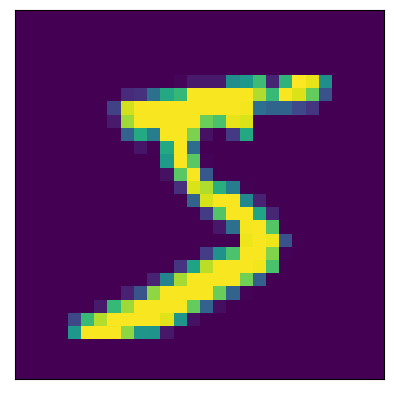

In [11]:
import torchvision
from torchvision.transforms import ToTensor

dataset_train = torchvision.datasets.MNIST(root='', train=True, transform=ToTensor(), download=True) # Load the training part of MNIST dataset
dataset_test = torchvision.datasets.MNIST(root='', train=False, transform=ToTensor(), download=True) # Load the testing part of MNIST dataset

digit_index_0, label_index_0 = dataset_train[0]
print(f"Shape of first digit: {digit_index_0.shape}, label of first digit: {label_index_0}")

show(digit_index_0)

Shape of train images: torch.Size([1, 28, 28]).
Labels:
[2, 6, 5, 6, 2, 3, 6, 1, 0, 9, 2, 4, 3, 8, 1, 1].

Grid of train images:


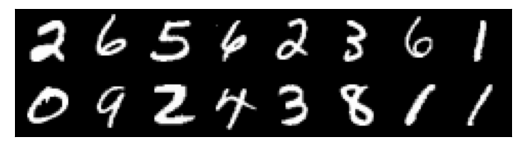

In [12]:
random_train_samples = [dataset_train[idx] for idx in np.random.choice(len(dataset_train), 16)]
random_train_X = [sample[0] for sample in random_train_samples]
random_train_y = [sample[1] for sample in random_train_samples]
train_grid = make_grid(random_train_X)

print(f"Shape of train images: {random_train_X[0].shape}.")
print(f"Labels:\n{random_train_y}.\n")
print(f"Grid of train images:")
show(train_grid)

Shape of test images: torch.Size([1, 28, 28]).
Labels:
[7, 7, 9, 4, 0, 8, 6, 9, 6, 9, 3, 1, 9, 0, 2, 8].

Grid of test images:


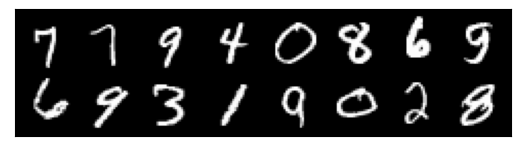

In [13]:
random_test_samples = [dataset_test[idx] for idx in np.random.choice(len(dataset_test), 16)]
random_test_X = [sample[0] for sample in random_test_samples]
random_test_y = [sample[1] for sample in random_test_samples]
test_grid = make_grid(random_test_X)

print(f"Shape of test images: {random_test_X[0].shape}.")
print(f"Labels:\n{random_test_y}.\n")
print(f"Grid of test images:")

show(test_grid)

In [14]:
def get_decoded_data_from_dataset(dataset):
  samples = [sample for sample in dataset]
  X_split = [sample[0] for sample in samples]
  y_split = [sample[1] for sample in samples]

  return torch.cat(X_split), torch.tensor(y_split)

In [15]:
# --- Split between training set and test set
# --- (m, n_0)

X_train, y_train = get_decoded_data_from_dataset(dataset_train)
X_test, y_test = get_decoded_data_from_dataset(dataset_test)

# Flatten data
# --- Convert to proper shape: (m, 1, 28, 28) -> (m, 784)
y_train = y_train.view((-1,1))
y_test = y_test.view((-1, 1))

X_train = X_train.view((X_train.shape[0], -1))
X_test = X_test.view((X_test.shape[0], -1))

# Only select classes 0 and 1
indexes_train = torch.logical_or(y_train == 0, y_train == 1)
indexes_test = torch.logical_or(y_test == 0, y_test == 1)

X_train, y_train = X_train[indexes_train[:, 0]], y_train[indexes_train[:, 0]]
X_test, y_test = X_test[indexes_test[:, 0]], y_test[indexes_test[:, 0]]

# --- Standardize data

X_train = F_standardize(X_train)
X_test = F_standardize(X_test)

# --- Convert to oneHotEncoding: (nbExamples, 1) -> (nbExamples, nbClass)
n_0 = X_train.shape[1]
n_2 = 1

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("n_0=n_in: {} n_2=n_out: {}".format(n_0, n_2))

X_train.shape: torch.Size([12665, 784])
X_test.shape: torch.Size([2115, 784])
y_train.shape: torch.Size([12665, 1])
y_test.shape: torch.Size([2115, 1])
y_train.shape: torch.Size([12665, 1])
y_test.shape: torch.Size([2115, 1])
n_0=n_in: 784 n_2=n_out: 1


# Define the MLP class with forward, backward and update methods

In [22]:
class CustomMLP():
    """
    A class used to represent a Multi-Layer Perceptron with 1 hidden layer

    ...

    Attributes
    ----------
    W1, b1, W2, b2:
        weights and biases to be learnt
    Z1, A1, Z2, A2:
        values of the internal neurons to be used for backpropagation
    dW1, db1, dW2, db2, dZ1, dZ2:
        partial derivatives of the loss w.r.t. parameters
    VdW1, Vdb1, VdW2, Vdb2:
        momentum terms
        
    Methods
    -------
    forward_propagation
    
    backward_propagation
    
    update_parameters
    
    """

    #W1, b1, W2, b2 = [], [], [], []
    #A0, Z1, A1, Z2, A2 = [], [], [], [], []
    #dW1, db1, dW2, db2 = [], [], [], []   
    #dZ1, dA1, dZ2 = [], [], []
    # --- for momentum
    #VdW1, Vdb1, VdW2, Vdb2 = [], [], [], []     
    
    def __init__(self, n_0, n_1, n_2):
        self.W1 = torch.randn(n_0, n_1) * 0.01
        self.b1 = torch.zeros((1, n_1))
        self.W2 = torch.randn(n_1, n_2) * 0.01
        self.b2 = torch.zeros((1, n_2))        
        # --- for momentum
        self.VdW1 = torch.zeros((n_0, n_1)) 
        self.Vdb1 = torch.zeros((1, n_1))
        self.VdW2 = torch.zeros((n_1, n_2))
        self.Vdb2 = torch.zeros((1, n_2))
        return            

    def M_forwardPropagation(self, X):
        """Forward propagation in the MLP

        Parameters
        ----------
        X: torch.Tensor (nbData, nbDim)
            observation data

        Return
        ------
        preds: torch.Tensor (nbData, 1)
            predicted value by the MLP
        """
        
        # --- START CODE HERE (02)
        self.A0 = X
        
        self.Z1 = torch.matmul(self.A0, self.W1) + self.b1
        self.A1 = torch.sigmoid(self.Z1)
        
        self.Z2 = torch.matmul(self.A1, self.W2) + self.b2
        self.A2 = torch.sigmoid(self.Z2)
        
        preds = self.A2
        # --- END CODE HERE
        
        return preds


    def M_backwardPropagation(self, X, y):
        """Backward propagation in the MLP

        Parameters
        ----------
        X: torch.Tensor (nbData, nbDim)
            observation data
        y: torch.Tensor (nbData, 1)
            ground-truth class to predict
            
        """
        
        m = y.shape[0]
        
        # --- START CODE HERE (03)

        # --- END CODE HERE
        self.dZ2 = self.A2 - y
        self.dW2 = torch.matmul(self.A1.T, self.dZ2) / m
        self.db2 = torch.sum(self.dZ2, axis=0, keepdim=True) / m
        self.dA1 = torch.matmul(self.dZ2, self.W2.T)
        
        self.dZ1 = self.dA1 * (self.A1 * (1 - self.A1))
        self.dW1 = torch.matmul(self.A0.T, self.dZ1) / m
        self.db1 = torch.sum(self.dZ1, axis=0, keepdim=True) / m
        return

    
    def M_gradientDescent(self, alpha):
        """Update the parameters of the network using gradient descent

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent
            
        """
        # --- START CODE HERE (04)
        self.W1 -= alpha * self.dW1
        self.b1 -= alpha * self.db1
        self.W2 -= alpha * self.dW2
        self.b2 -= alpha * self.db2
        # --- END CODE HERE
            
        return

    
    def M_momentum(self, alpha, beta):
        """Update the parameters of the network using momentum method

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent
        beta: float scalar
            momentum term 
        """
        
        # --- START CODE HERE (05)
        self.VdW1 = beta * self.VdW1 + (1 - beta) * self.dW1
        self.W1 -= alpha * self.VdW1

        self.Vdb1 = beta * self.Vdb1 + (1 - beta) * self.db1
        self.b1 -= alpha * self.Vdb1

        self.VdW2 = beta * self.VdW2 + (1 - beta) * self.dW2
        self.W2 -= alpha * self.VdW2

        self.Vdb2 = beta * self.Vdb2 + (1 - beta) * self.db2
        self.b2 -= alpha * self.Vdb2
        # --- END CODE HERE
                
        return

# Perform training using batch-gradiant and epochs

In [23]:
# hyper-parameters
n_1 = 10 # number of hidden neurons
nb_epoch = 10 # number of epochs (number of iterations over full training set)
alpha=0.1 # learning rate
beta=0.9 # beta parameters for momentum


# Instantiate the class MLP with providing 
# the size of the various layers (n_0=n_input, n_1=n_hidden, n_2=n_output) 
myMLP = CustomMLP(n_0, n_1, n_2)

train_loss, train_accuracy, test_loss, test_accuracy = [], [], [], []

# Run over epochs
for num_epoch in range(1, nb_epoch + 1):
    
    # --- Forward
    train_preds = myMLP.M_forwardPropagation(X_train)
    # --- Store results on train
    train_loss.append(F_computeLoss(train_preds, y_train))
    train_accuracy.append(F_computeAccuracy(train_preds, y_train))
    
    # --- Backward
    myMLP.M_backwardPropagation(X_train, y_train)
    
    # --- Update
    myMLP.M_gradientDescent(alpha)
    #myMLP.M_momentum(alpha, beta)

    # --- Store results on test
    test_preds = myMLP.M_forwardPropagation(X_test)
    test_loss.append(F_computeLoss(test_preds, y_test))    
    test_accuracy.append(F_computeAccuracy(test_preds, y_test))
    
    if (num_epoch % 1)==0: 
        print("epoch: {0:d} (loss: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(num_epoch, train_loss[-1], test_loss[-1], train_accuracy[-1], test_accuracy[-1]))

TypeError: unsupported operand type(s) for *: 'Tensor' and 'module'

## Display train/test loss and accuracy

In [ ]:
def display_losses_and_accuracies(train_loss, test_loss, train_accuracy, test_accuracy):
  plt.subplot(1,2,1)
  plt.plot(train_loss, 'r')
  plt.plot(test_loss, 'g--')
  plt.xlabel('# epoch')
  plt.ylabel('loss')
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.plot(train_accuracy, 'r')
  plt.plot(test_accuracy, 'g--')
  plt.xlabel('# epoch')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.show()

In [ ]:
display_losses_and_accuracies(train_loss, test_loss, train_accuracy, test_accuracy)

## Pytorch MNIST classification using a one-hidden layer MLP

In this section, you will train a MLP with one hidden layer to perform the classification of all MNIST images.

The objective function becomes the cross entropy and $n^{[2]}=10$ for 10 classes of digits.

The code to load the normalized dataset is provided, the missing code parts are inside the training loop.

The structure of the model is the following:
- Flatten layer to reshape the input to the shape (B, $n_0$)
- Linear layer that takes as input $n_0$ features and outputs $n_1$ features
- ReLU activation
- Linear layer that takes as input $n_1$ features and outputs $n_2$ logits

To create the model, use the [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) model and pass the adequate [layers](https://pytorch.org/docs/stable/nn.html).

In our case the parameters are:
- $n_0 = 28 \times 28 \times 1 = 784$ (number of pixels)
- $n_1 = 10$
- $n_2 = 10$ (digits of MNIST 0 to 9)

The optimizer to update the model is [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html). You can test to use momentum or not.

The [loss](https://pytorch.org/docs/stable/nn.html#loss-functions) function is the cross entropy that is a class that needs to be instantiate in Pytorch.

You will implement a training loop that updates the parameters at each iteration based on an [optimizer loop](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#optimization-loop). You will need to reset gradients to zero at each iteration before computing new gradients thanks to backpropagation to avoid accumulating gradients throughout training.

### Data Loading

In [ ]:
from torch.nn import Flatten, Sequential, Linear, ReLU, CrossEntropyLoss
from torch.optim import SGD
from torchvision.transforms import Compose, Normalize
from torch.utils.data import DataLoader


transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))]) # Convert the images to tensor and normalize the inputs.
dataset_train = torchvision.datasets.MNIST(root='', train=True, transform=transform, download=True)
dataset_test = torchvision.datasets.MNIST(root='', train=False, transform=transform, download=True)

train_dataloader = DataLoader(dataset_train, shuffle=False, batch_size=len(dataset_train), drop_last=False)
test_dataloader = DataLoader(dataset_test, shuffle=False, batch_size=len(dataset_test), drop_last=False)

### Uncomment for using mini batches, however you would have to update the training loop for computing epoch accuracies and losses.
#train_dataloader = DataLoader(dataset_train, shuffle=True, batch_size=256, drop_last=True)
#train_dataloader = DataLoader(dataset_train, shuffle=False, batch_size=256, drop_last=False)

### Training Loop

The slowness of the training loop in comparison with the handcrafted MLP is expected. It is due to the fact that in the first part of the TP, the images were decoded before going in training.

Generally in deep learning, because of RAM limitations, the images are decoded at each iteration, therefore it takes longer due to the overhead of the image decoded. This is how it is performed here through the common dataset into dataloader pipeline.



**Cells instructions**:

- Cell 06: 
  - instantiate the model
  - instantiate the optimizer 
  - instantiate the loss function.
- Cell 07: 
  - compute the model outputs 
  - feed to the loss function the outputs aswell as the targets (or labels) to retrieve the loss.
- Cell 08: 
  - reset the optimizer gradients
  - compute the backpropagation
- Cell 09:
  - update the parameters

In [ ]:
# hyper-parameters
n_1 = 10 # number of hidden neurons
n_2 = 10 # number of classes
nb_epoch = 10 # number of epochs (number of iterations over full training set)
alpha=0.1 # learning rate
beta=0.9 # beta parameters for momentum


# --- START CODE HERE (06)

model = # Define the model for 10 classes
optimizer = # Define the optimizer
loss_fn = # Define the criterion

# --- END CODE HERE

print("model:\n", model)
print("optimizer:\n", optimizer)

train_loss, train_accuracy, test_loss, test_accuracy = [], [], [], []

# Run over epochs
for num_epoch in range(1, nb_epoch + 1):
  model.train()
  for batch_idx, batch in enumerate(train_dataloader):
    # --- Forward
    X, y = batch

    # --- START CODE HERE (07)

    train_preds =
    loss = 

    # --- END CODE HERE

    accuracy = F_computeAccuracy(train_preds, y)
    
    # --- Store results on train
    train_loss.append(loss.item())
    train_accuracy.append(accuracy)
    
    # --- Backward
    # --- START CODE HERE (08)

    

    # --- END CODE HERE
    
    # --- Update parameters
    # --- START CODE HERE (09)



    # --- END CODE HERE

  with torch.no_grad():
    model.eval()
    for batch_idx, batch in enumerate(test_dataloader):
      # --- Store results on test
      X, y = batch
      test_preds = model(X)
      loss = loss_fn(test_preds, y)
      accuracy = F_computeAccuracy(test_preds, y)
      test_loss.append(loss.item())    
      test_accuracy.append(accuracy)
    
  if (num_epoch % 1)==0: 
      print("epoch: {0:d} (loss: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(num_epoch, train_loss[-1], test_loss[-1], train_accuracy[-1], test_accuracy[-1]))

In [ ]:
display_losses_and_accuracies(train_loss, test_loss, train_accuracy, test_accuracy)